# Expectation values of hydrogenic ions

In [1]:
using JAC
using Plots

In this tutorial, we would like to look at some basic (and well-known) properties of hydrogen-like ions and compare the nonrelativistic and relativistic theories. Let us first define a default grid and calculate the nonrelativistic electron wave functions for the ground state hydrogen on this grid. Instead of looking at an array of numbers, let's visualise the hydrogen wave function using the plot function. Note, the radial grid points are saved in grid.r .

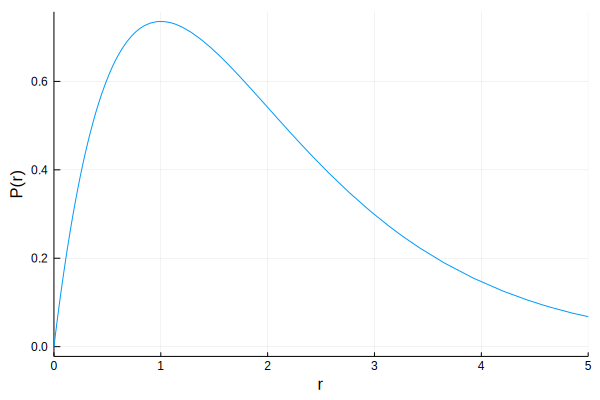

In [2]:
grid = Radial.Grid(true)
Z = 1.
Pnr_H_1s  = HydrogenicIon.radialOrbital(Shell("1s"), Z, grid)       
plot(grid.r, Pnr_H_1s, xlim=(0,5), labels=false, xaxis = "r", yaxis="P(r)" )

The radial dependence of the wave function is as expected, but we shoud still test it and check whether the generated wave functions are normalised, i.e. $\langle1s|1s\rangle = 1$. To do that, we can use the "Trapz" integration package, which simply performs trapezoidal integration over common Julia arrays. If you do not have this package installed, you can do it by executing the following.

In [3]:
#using Pkg
#Pkg.add("Trapz")
using Trapz

Now, the normalisation can be calculated simply by integrating the square of the wave function on the grid it was generated on. Note that for multiplying vectors, one needs to use ".*" instead of the simple multiplication sign.

In [4]:
norm = trapz(grid.r, Pnr_H_1s.*Pnr_H_1s)

1.0005860021985897

We see that the normalisation is equal to unity, i.e. $\langle1s|1s\rangle =1$, as expected. Further, we can verify other known properties of the hydrogen wave function. For example, the expectation values of the $1/r, r$, and $r^2$ operators are analytically known. As is often taught in many university atomic physics courses, the expectation values are $\langle1s|1/r|1s\rangle=1 a_0$, $\langle1s|r|1s\rangle=3/2 a_0$, $\langle1s|r^2|1s\rangle=3 a_0$, where $ a_0 $ is the Bohr radius. Let us verify this with JAC.

In [5]:
# expectation value of 1/r
print(trapz(grid.r, Pnr_H_1s.*Pnr_H_1s./grid.r), "\n")
# expectation value of r
print(trapz(grid.r, Pnr_H_1s.*Pnr_H_1s.*grid.r), "\n")
# expectation value of r^2
print(trapz(grid.r, Pnr_H_1s.*Pnr_H_1s.*grid.r.*grid.r), "\n")

1.000586002228048
1.5008790037029989
3.0017580108220527


In JAC, all computations are internally performed and returned always in atomic units and hence $a_0=1$. We can, therefore, see that our calculation confirms the analytically predicted expectation values. 

Until now, we considered the solutions of the nonrealtivistic tion. Until now, we considered the solutions of the nonrealtivistic . In many cases, these nonrelativistic predictions are rather accurate. For heavy elements, however, the nonrelativistic theory comes short and the relativistic Dirac equation needs to be used instead.  In the following examples, we will compare the nonrelativistic and relativistic radial wave functions and energies in order to get a intuition about the limits of the Schrödinger equation solutions. Firstly, let us generate the relativistic electron wavefunction for the hydrogen atom in its ground state, as well as the nonrelativistic as well as relativistic wave functions for hydrogen-like uranium.

In [6]:
Z = 1.
PQr_H_1s   = HydrogenicIon.radialOrbital(Subshell("1s_1/2"), Z, grid)   
Z = 92.
Pnr_U_1s   = HydrogenicIon.radialOrbital(Shell("1s"), Z, grid)     
PQr_U_1s   = HydrogenicIon.radialOrbital(Subshell("1s_1/2"), Z, grid)  

2-element Array{Array{Float64,1},1}:
 [0.00093191, 0.00310765, 0.00575893, 0.00847046, 0.0109029, 0.0127779, 0.01389, 0.0145872, 0.0162955, 0.0189341  …  0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]                             
 [-0.000413646, -0.00137939, -0.00255621, -0.00375977, -0.00483947, -0.00567171, -0.00616532, -0.00647482, -0.00723308, -0.00840425  …  -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0, -0.0]

As before, it might be instructive to check that the generated wave functions are normalised. Then, let us plot the uranium radial wave functions. Note that the relativistic wave function is an array, containing two arrays. These are the large (P) and small (Q) component, respectively. The normalisation of a relativistic wavefunction is then given by $\langle P| P \rangle + \langle Q| Q \rangle =1$

1.0005860021985902
1.0005860022248552
1.0005860022179658


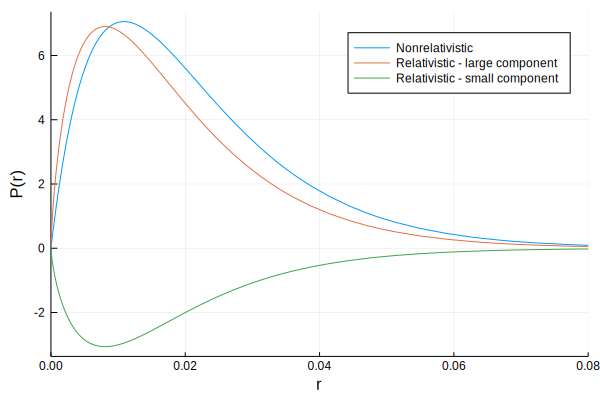

In [7]:
print(trapz(grid.r, PQr_H_1s[1] .*PQr_H_1s[1]+PQr_H_1s[2].*PQr_H_1s[2]), "\n")
print(trapz(grid.r, Pnr_U_1s .*Pnr_U_1s), "\n")
print(trapz(grid.r, PQr_U_1s[1] .*PQr_U_1s[1]+PQr_U_1s[2].*PQr_U_1s[2]), "\n")
plot(grid.r, [Pnr_U_1s, PQr_U_1s] , xlim=(0,0.08), labels=["Nonrelativistic" "Relativistic - large component" "Relativistic - small component"  ], xaxis = "r", yaxis="P(r)" )

We can clearly see, that all wave functions are normalised. Moreover, the peak of the relativistic wave function components is nearer to the nucleus than the nonrelativistic wavefunction. This effect is called the relativistic wave function contraction and it influences all possible observables of the atom. For example, we can calculate a commulative probability which expresses the probability to find the electron anywhere from the nucleus to the given distance $d$ from the nucleus. We can write the probability as $\int_0^d |P(r)|^2 dr$. Let us calculate and plot this cummulative probability for the hydrogen-like uranium.

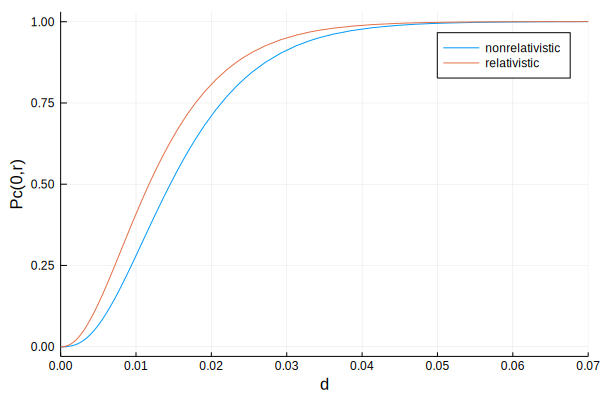

In [8]:
Pcummulative_nr = []
PQcummulative_r = []
for i=1:length(grid.r)
    append!(Pcummulative_nr, trapz(grid.r[1:i], Pnr_U_1s[1:i] .*Pnr_U_1s[1:i]))
    append!(PQcummulative_r, trapz(grid.r[1:i], PQr_U_1s[1][1:i] .*PQr_U_1s[1][1:i]+PQr_U_1s[2][1:i].*PQr_U_1s[2][1:i]))
end
plot(grid.r, [Pcummulative_nr, PQcummulative_r], xlim=(0,0.07), xaxis = "d", yaxis = "Pc(0,r)", labels=["nonrelativistic" "relativistic"])

Even here, we can see that the relativistic calculation predicts to find the atom much nearer to the nucleus than the nonrelativistic solution. This shift can be also observed in the expectation values $\langle 1s | r |1s \rangle$. We already saw, that this expectation value for hydrogen is equal to 3/2, according to the nonrelativistic theory. Let us see, how does this expectation value change if it were calculated relativistically.

In [9]:
expnr_H_1s = trapz(grid.r, Pnr_H_1s .*Pnr_H_1s.*grid.r)
expr_H_1s = trapz(grid.r, (PQr_H_1s[1] .*PQr_H_1s[1]+PQr_H_1s[2].*PQr_H_1s[2]).*grid.r)
[expnr_H_1s, expr_H_1s, (expnr_H_1s/expr_H_1s-1)*100]

3-element Array{Float64,1}:
 1.5008790037029989   
 1.5008523620683076   
 0.0017751002939769833

The predictions of nonrelativistic (first number) and relativistic (second number) calculations are nearly identical. The relativistic wave function contraction shifts the expectation value of $r$ in hydrogen by $0.0018\%$ which is indeed negligible. Let us turn our attention to uranium and repeat the same calculation for this heavy element.

In [10]:
expnr_U_1s = trapz(grid.r, Pnr_U_1s .*Pnr_U_1s.*grid.r)
expr_U_1s = trapz(grid.r, (PQr_U_1s[1] .*PQr_U_1s[1]+PQr_U_1s[2].*PQr_U_1s[2]).*grid.r)
[expnr_U_1s, expr_U_1s, (expnr_U_1s/expr_U_1s-1)*100]

3-element Array{Float64,1}:
  0.016313902215690266
  0.01349849929341018 
 20.857155014665473   

The relativistic wave function contraction shifts the expectation by more than $20\%$ in this case, which is far from negligible. This effect can play a significant role in many interactions, such as photoexcitation, photoionization or Auger decays, it is therefore important to keep it in mind and build the intuition on simple hydrogenic systems. 
Lastly, let inspect the electron binding energies and how they differ between the two theories. Let us first look at our two examples, the hydrogen atom and hydrogen-like uranium.

In [11]:
Z = 1.
Enr_H_1s =HydrogenicIon.energy(Shell("1s"), Z)
Er_H_1s=HydrogenicIon.energy(Subshell("1s_1/2"), Z)
Z=92.
Enr_U_1s=HydrogenicIon.energy(Shell("1s"), Z)
Er_U_1s=HydrogenicIon.energy(Subshell("1s_1/2"), Z)
[Enr_H_1s, Er_H_1s, Enr_U_1s, Er_U_1s]

  Energy for shell 1s is [in eV]: -1.36056930e+01
  Energy for subshell 1s_1/2 is [in eV]: -1.36058741e+01
  Energy for shell 1s is [in eV]: -1.15158586e+05
  Energy for subshell 1s_1/2 is [in eV]: -1.32279933e+05


4-element Array{Float64,1}:
    -0.5               
    -0.5000066565952374
 -4232.0               
 -4861.1979036987195   

As we would expect from our previous calculations, the relativistic effects in hydrogen are small, while they are significant for uranium. To build an intuition, it would be good to know the influence of relativistic effects for all hydrogen-like ions with nuclear charges between 1 and 92.

In [12]:
Zs = []
Enr = []
Er = []
for Z = 1.:92.
    append!(Zs, Z)
    append!(Enr, HydrogenicIon.energy(Shell("1s"), Z))
    append!(Er, HydrogenicIon.energy(Subshell("1s_1/2"), Z))
end

  Energy for shell 1s is [in eV]: -1.36056930e+01
  Energy for subshell 1s_1/2 is [in eV]: -1.36058741e+01
  Energy for shell 1s is [in eV]: -5.44227720e+01
  Energy for subshell 1s_1/2 is [in eV]: -5.44256704e+01
  Energy for shell 1s is [in eV]: -1.22451237e+02
  Energy for subshell 1s_1/2 is [in eV]: -1.22465912e+02
  Energy for shell 1s is [in eV]: -2.17691088e+02
  Energy for subshell 1s_1/2 is [in eV]: -2.17737477e+02
  Energy for shell 1s is [in eV]: -3.40142325e+02
  Energy for subshell 1s_1/2 is [in eV]: -3.40255607e+02
  Energy for shell 1s is [in eV]: -4.89804948e+02
  Energy for subshell 1s_1/2 is [in eV]: -4.90039919e+02
  Energy for shell 1s is [in eV]: -6.66678957e+02
  Energy for subshell 1s_1/2 is [in eV]: -6.67114420e+02
  Energy for shell 1s is [in eV]: -8.70764353e+02
  Energy for subshell 1s_1/2 is [in eV]: -8.71507530e+02
  Energy for shell 1s is [in eV]: -1.10206113e+03
  Energy for subshell 1s_1/2 is [in eV]: -1.10325210e+03
  Energy for shell 1s is [in eV]: -1.

To understand the results, let us plot the binding energies of the $1s$ electron of hydrogen-like ions as predicted by both theories as a function of the nuclear charge. 

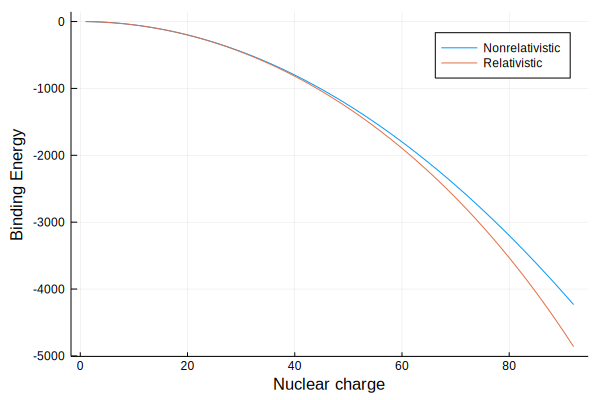

In [13]:
plot(Zs, [Enr, Er], xlabel = "Nuclear charge", ylabel="Binding Energy", label = ["Nonrelativistic" "Relativistic"])

To evaluate the relativistic effects directly, let's calculate by how many percent the relativistic effects shift the binding energy of the $1s$ electrons.

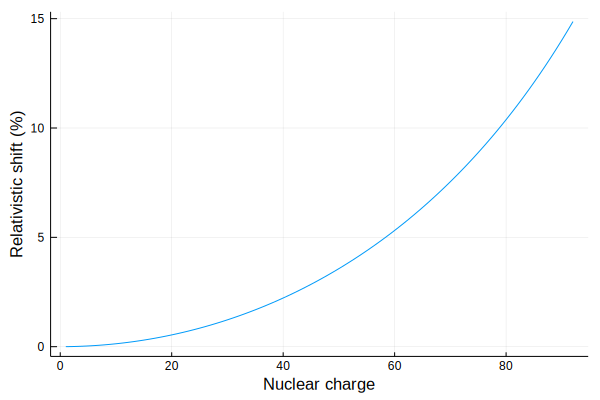

In [14]:
plot(Zs, (Enr.\Er.-1)*100 , xlabel = "Nuclear charge", ylabel="Relativistic shift (%)", label=false)